## NumPy ndarray 数据处理

- 数组的轴与转置等


- ufunc 函数


- NumPy 中 einsum


- NumPy 之 C 语言扩展

In [1]:
import numpy as np

## 一、数组的轴

### 增加新的轴

- None

或者

- np.newaxis

In [2]:
x = np.arange(6).reshape(2,3)
x.shape

(2, 3)

In [3]:
x = x[:,None,:]
x.shape

(2, 1, 3)

In [4]:
x = x[np.newaxis, ...]
x.shape

(1, 2, 1, 3)

### 删除多余的轴

- numpy.squeeze() 


- 从数组的形状中删除单维度条目，即把 shape 中为 1 的维度去掉

In [8]:
x = np.arange(6).reshape(2,1,1,3)
x

array([[[[0, 1, 2]]],


       [[[3, 4, 5]]]])

In [10]:
y1 = x.squeeze(axis=2)
y1

array([[[0, 1, 2]],

       [[3, 4, 5]]])

In [11]:
y2 = x.squeeze()
y2

array([[0, 1, 2],
       [3, 4, 5]])

In [12]:
y2[0] = 10
y2

array([[10, 10, 10],
       [ 3,  4,  5]])

In [13]:
# 原来的数组 x 也被改变了
x

array([[[[10, 10, 10]]],


       [[[ 3,  4,  5]]]])

### 转置

- numpy.transpose

In [14]:
x = np.arange(9).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [17]:
y = np.transpose(x) # 或者 y = x.transpose() 或者 x.T

# 沿对角线翻转
y

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [18]:
# 将 x 的两个轴调换顺序
y = np.transpose(x, [1, 0])
y

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [19]:
x = np.array([3,2,1,0,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(2, 2, 4)
x

array([[[ 3,  2,  1,  0],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [20]:
y1 = np.transpose(x, [1, 0, 2])
y1

array([[[ 3,  2,  1,  0],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### 结合下面的图理解一下 transpose，左边是转置前，右边是转置后

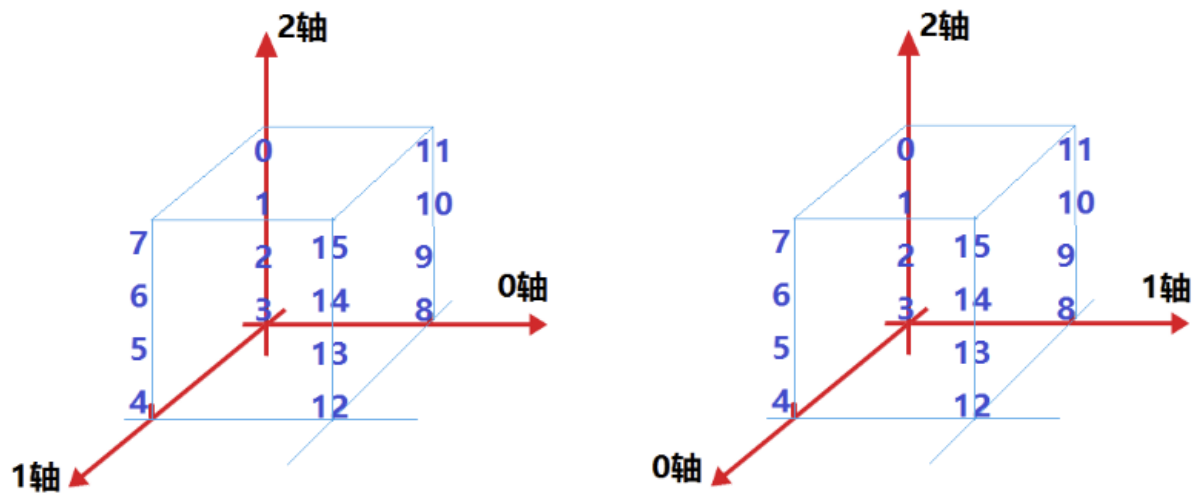

In [18]:
y2 = np.transpose(x, [2, 0, 1])
y2

array([[[ 3,  4],
        [ 8, 12]],

       [[ 2,  5],
        [ 9, 13]],

       [[ 1,  6],
        [10, 14]],

       [[ 0,  7],
        [11, 15]]])

In [19]:
# 数据还是那些数据，更改的是各个轴上的步长 stride

x.strides, y1.strides, y2.strides

((64, 32, 8), (32, 64, 8), (8, 64, 32))

In [20]:
# 还是同一份数据

id(x.data), id(y1.data), id(y2.data)

(140060631173968, 140060631173968, 140060631173968)

In [14]:
# 再看一个例子，注意下图中的步长

x = np.arange(16).reshape(2, 2, 4)
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [16]:
x10 = x.transpose((1, 0, 2))
x10

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

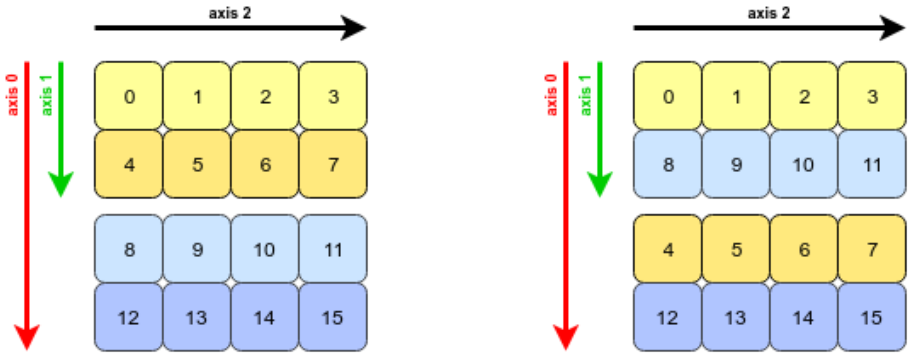

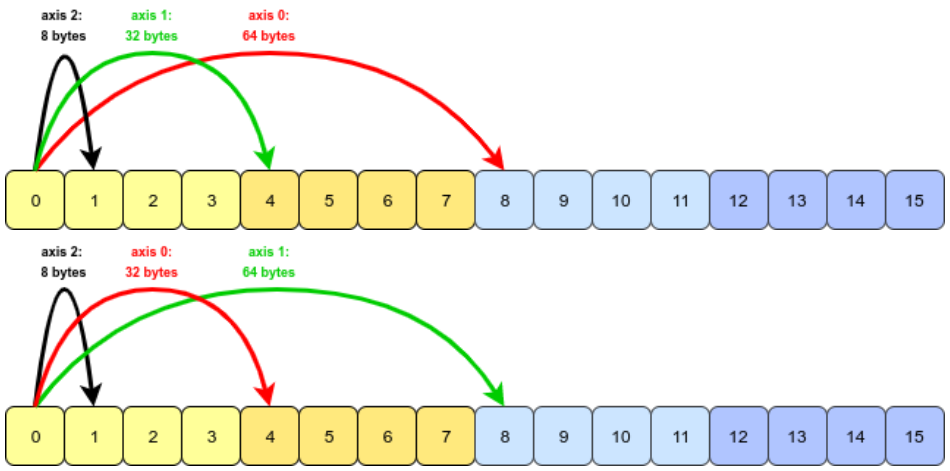

或者看下图，注意下标。

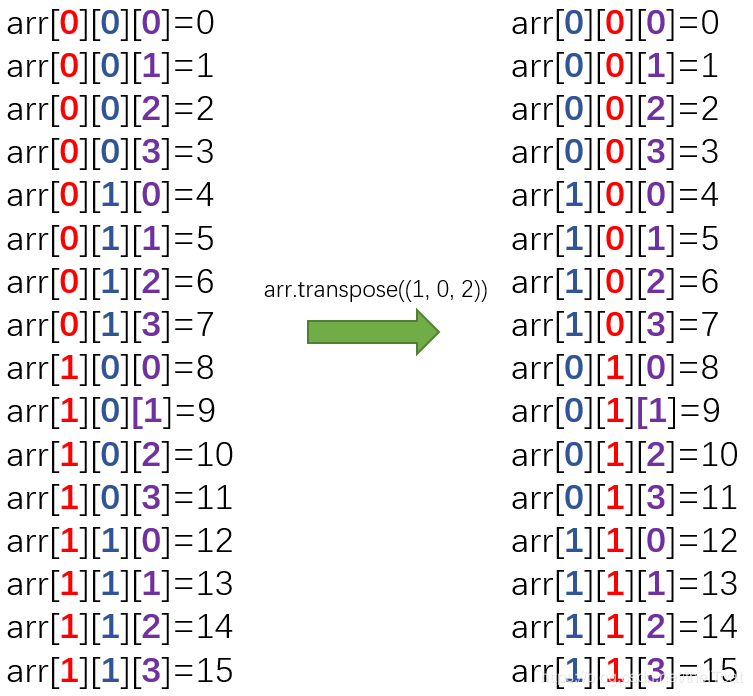

### 实际例子：RGB 图像数据

- 每张图像由红绿蓝三个通道组成，每个通道对应一个 32×32 的二维数组


- 下面的例子中，0 轴表示通道，但转置后通道改为 2 轴了，不同的软件包会使用不同的轴次序

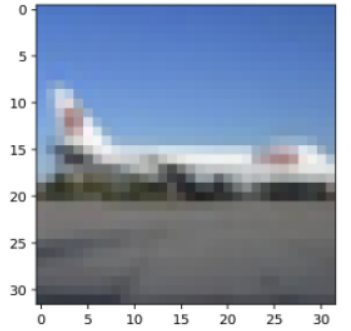

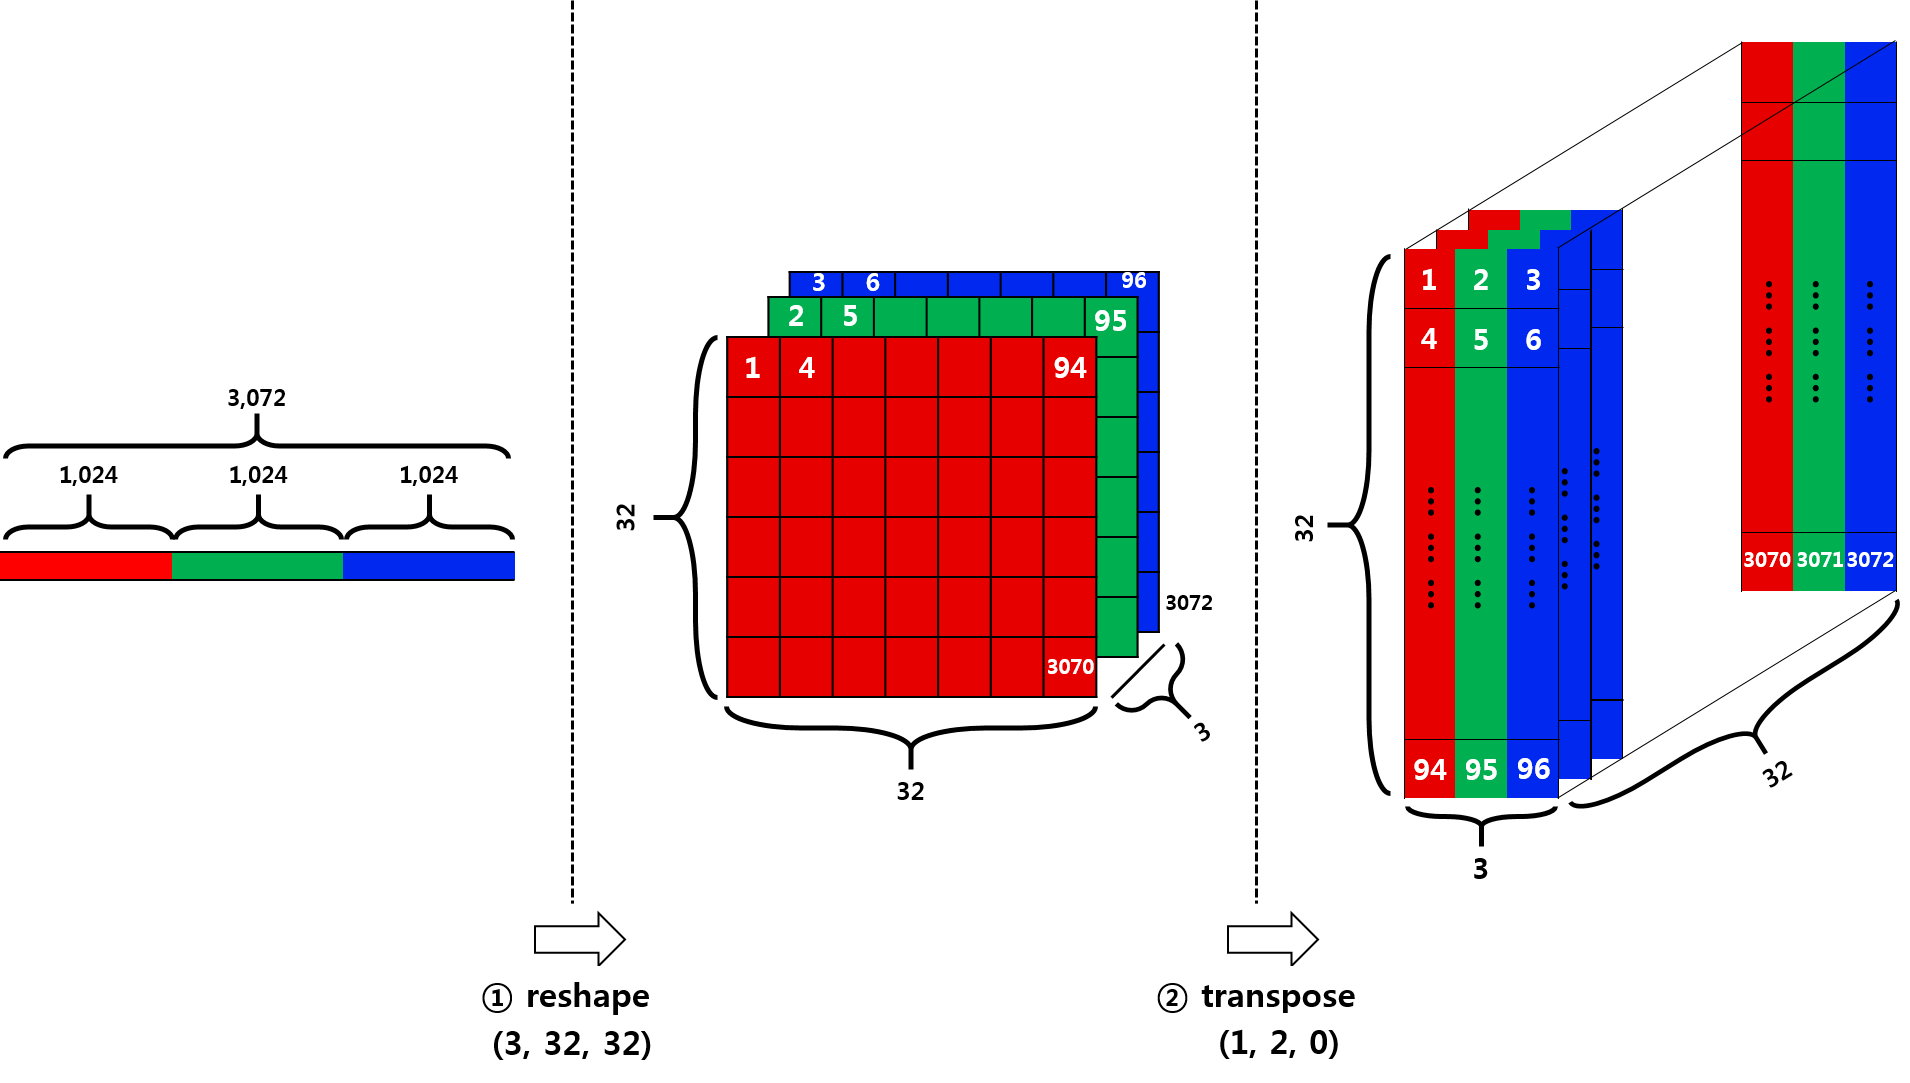

- 变换某个轴上元素的次序，跟上面不同，这里不改变轴

In [23]:
z = x[..., (3, 2, 1, 0)]
z

array([[[ 3,  2,  1,  0],
        [ 7,  6,  5,  4]],

       [[11, 10,  9,  8],
        [15, 14, 13, 12]]])

## 课堂练习

- 将上图中的数据从原始的 shape (3, 32, 32) 转化到新的 shape (32, 32, 3)，然后查看各自的步长。


- 假设有 100 张上述图像数据，将它们放到一个数组中，其 shape 为 (100, 32, 32, 3)。

In [24]:
M = np.arange(3072).reshape(3, 32, 32)
M.shape, M.strides

((3, 32, 32), (4096, 128, 4))

In [25]:
M_ = M.transpose([1,2,0])
M_.shape, M_.strides

((32, 32, 3), (128, 4, 4096))

In [26]:
Ms = np.arange(100*3072).reshape(100, 3, 32, 32)
Ms.shape

(100, 3, 32, 32)

In [27]:
Ms_ = Ms.transpose([0, 2, 3, 1])
Ms_.shape

(100, 32, 32, 3)

## 二、ufunc 函数

- ufunc 是 universal function 的缩写，是指能对数组的每个元素进行统一操作的函数。


- NumPy 内置的许多 ufunc 函数是 C 语言实现的，计算效率高。

In [28]:
x = np.linspace(0, 2*np.pi, 5)
x

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

In [29]:
y, z = np.sin(x), np.cos(x)
y, z

(array([ 0.0000000e+00,  1.0000000e+00,  1.2246468e-16, -1.0000000e+00,
        -2.4492936e-16]),
 array([ 1.0000000e+00,  6.1232340e-17, -1.0000000e+00, -1.8369702e-16,
         1.0000000e+00]))

In [30]:
# 覆盖 x
np.sin(x, x)
x

array([ 0.0000000e+00,  1.0000000e+00,  1.2246468e-16, -1.0000000e+00,
       -2.4492936e-16])

In [33]:
# np.sin(x,x) 中 x 的数据类型要求前后一致
x = np.arange(10)#, dtype=np.float32)
np.sin(x, x)

TypeError: ufunc 'sin' output (typecode 'd') could not be coerced to provided output parameter (typecode 'l') according to the casting rule ''same_kind''

In [34]:
# 需要改成
x = np.arange(10, dtype=np.float32)
np.sin(x,x)

array([ 0.        ,  0.84147096,  0.9092974 ,  0.14112   , -0.7568025 ,
       -0.9589243 , -0.2794155 ,  0.6569866 ,  0.98935825,  0.4121185 ],
      dtype=float32)

### np.sin vs python 之 math.sin

In [35]:
import time
import math
import numpy as np

In [41]:
x = [i for i in range(1000000)]

# math.sin
start = time.process_time()
for i, t in enumerate(x):
    x[i] = math.sin(t)
math_time = time.process_time()-start    

# numpy.sin
x = np.array(x, dtype=np.float64)
start = time.process_time()
np.sin(x, x)
numpy_time = time.process_time()-start

# comparison
math_time, numpy_time, str(math_time/numpy_time) + ' 倍'

(0.265625, 0.015625, '17.0 倍')

### reduce

- 沿着轴对数组进行约简操作，相当于将运算符 < op > 插入到沿轴的所有子数组或者元素当中。


- 格式为：< op >.reduce (array=, axis=0, dtype=None)

In [35]:
np.add.reduce([1,2,3])

6

In [36]:
np.add.reduce([[1,2,3],[4,5,6]], axis=1)

array([ 6, 15])

In [37]:
np.multiply.reduce([[1,2,3],[4,5,6]], axis=1)

array([  6, 120])

### accumulate

- 与 reduce 类似，只是它返回的数组和输入的数组的 shape 相同，保存所有的中间计算结果

In [38]:
np.add.accumulate([1,2,3])

array([1, 3, 6])

In [39]:
np.add.accumulate([[1,2,3],[4,5,6]], axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]])

#### 自定义 ufunc 函数

In [42]:
# 自定义一个表示阶梯函数的 python 函数
def ufunc_diy(x):
    c, c0, hc = 0.618, 0.518, 1.0
    x = x - int(x) 
    if x >= c: 
        r = 0.0
    elif x < c0: 
        r = x / c0 * hc
    else: 
        r = (c-x) / (c-c0) * hc
    return r

In [43]:
x = np.linspace(0, 2, 1000000)

In [44]:
# 该函数不能直接操作数组，下面会出错

ufunc_diy(x)

TypeError: only size-1 arrays can be converted to Python scalars

In [45]:
# 只能用 for 循环

start = time.process_time()
y1 = np.array([ufunc_diy(t) for t in x])
time_1 = time.process_time()-start
time_1

1.109375

### frompyfunc 函数

- 将一个计算单个元素的函数转换成 ufunc 函数

In [46]:
ufunc = np.frompyfunc(ufunc_diy, 1, 1)

In [47]:
start = time.process_time()
y2 = ufunc(x)
time_2 = time.process_time()-start
time_2

0.296875

In [45]:
y2

array([0.0, 0.0, 0.0, ..., 0.410540630315597, -1.2527023691910375,
       -1.6004237113252289], dtype=object)

## 三、NumPy 之 c 扩展

- ctypes


- Cython


- numba


- ...

### 1、ctypes

- ctypes 是 Python 的一个外部库，提供和 C 语言兼容的数据类型，可以很方便地调用 dll/so 中输出的 C 接口函数。

In [ ]:
# ufunc.c
'''
void ufunc_diy(double *x, double *y, int size) {

    double xx,r,c=0.618,c0=0.518,hc=1.0;
    for(int i=0;i<size;i++) {
        xx = x[i]-(int)(x[i]);
        if (xx>=c) r=0.0;
        else if (xx<c0) r=xx/c0*hc;
        else r=(c-xx)/(c-c0)*hc;
        y[i]=r;
    }
}
'''

In [ ]:
# ufunc.py
""" Example of wrapping a C library function that accepts a C double array as
    input using the numpy.ctypeslib. """

import numpy as np
import numpy.ctypeslib as npct
from ctypes import c_int

array_1d_double = npct.ndpointer(dtype=np.double, ndim=1, flags='CONTIGUOUS')

# load the library, using numpy mechanisms
lib = npct.load_library("lib_ufunc", ".")

# setup the return types and argument types
lib.ufunc_diy.restype = None
lib.ufunc_diy.argtypes = [array_1d_double, array_1d_double, c_int]

def ufunc_diy_func(in_array, out_array):
    return lib.ufunc_diy(in_array, out_array, len(in_array))

In [75]:
# 编译
# gcc -shared -fPIC -O2 ufunc.c -ldl -o lib_ufunc.so

In [172]:
import time
import numpy as np
import ufunc

start = time.process_time() 
ufunc.ufunc_diy_func(x, x)
end = time.process_time()
print("ufunc_diy time: ", end-start)

ufunc_diy time:  0.005073641999999268


In [ ]:
# python test_ufunc.py 
# ufunc_diy time:  0.003 - 0.008

### 2、Cython

- Cython 是 Python 的一个超集，可以编译为 C，Cython 结合了 Python 的易用性和原生 C 代码的高效率。

In [ ]:
# ufunc_diy.h
void ufunc_diy(double * in_array, double * out_array, int size);

In [ ]:
# ufunc_diy.c
void ufunc_diy(double *x, double *y, int size) {

    double xx,r,c=0.618,c0=0.518,hc=1.0;
    for(int i=0;i<size;i++) {
        xx = x[i]-(int)(x[i]);
        if (xx>=c) r=0.0;
        else if (xx<c0) r=xx/c0*hc;
        else r=(c-xx)/(c-c0)*hc;
        y[i]=r;
    }
}

In [8]:
# Cython支持 NumPy
# 在代码中声明 cimport numpy，使用函数。

In [ ]:
#_ufunc_cython.pyx_
""" Example of wrapping a C function that takes C double arrays as input using
    the Numpy declarations from Cython """

# cimport the Cython declarations for numpy
cimport numpy as np

# if you want to use the Numpy-C-API from Cython
# (not strictly necessary for this example, but good practice)
np.import_array()

# cdefine the signature of our c function
cdef extern from "ufunc_diy.h":
    void ufunc_diy (double * in_array, double * out_array, int size)

# create the wrapper code, with numpy type annotations
def ufunc_diy_func(np.ndarray[double, ndim=1, mode="c"] in_array not None,
                   np.ndarray[double, ndim=1, mode="c"] out_array not None):
    ufunc_diy(<double*> np.PyArray_DATA(in_array),
              <double*> np.PyArray_DATA(out_array),
              in_array.shape[0])

In [ ]:
# setup.py
from distutils.core import setup, Extension
import numpy
from Cython.Distutils import build_ext

setup(
    cmdclass={'build_ext': build_ext},
    ext_modules=[Extension("ufunc_cython",
                 sources=["_ufunc_cython.pyx", "ufunc_diy.c"],
                 include_dirs=[numpy.get_include()])],
)
# 或者
from distutils.core import setup
import numpy
from Cython.Build import cythonize
 
setup(
    ext_modules=cythonize("_ufunc_cython.pyx", annotate=True),
    include_dirs=[numpy.get_include()]
)

In [ ]:
# 编译
python setup.py build_ext --inplace

In [ ]:
# 可以看到多了两个文件，一个是_ufunc_cython.c一个是ufunc_cython.so（如果是windows，则是.pyd）
# c文件就是cython将pyx文件解析成一个c文件，它不依赖平台，而so或者pyd文件，则是将c文件进行编译后的动态链接库，依赖于平台。
# 

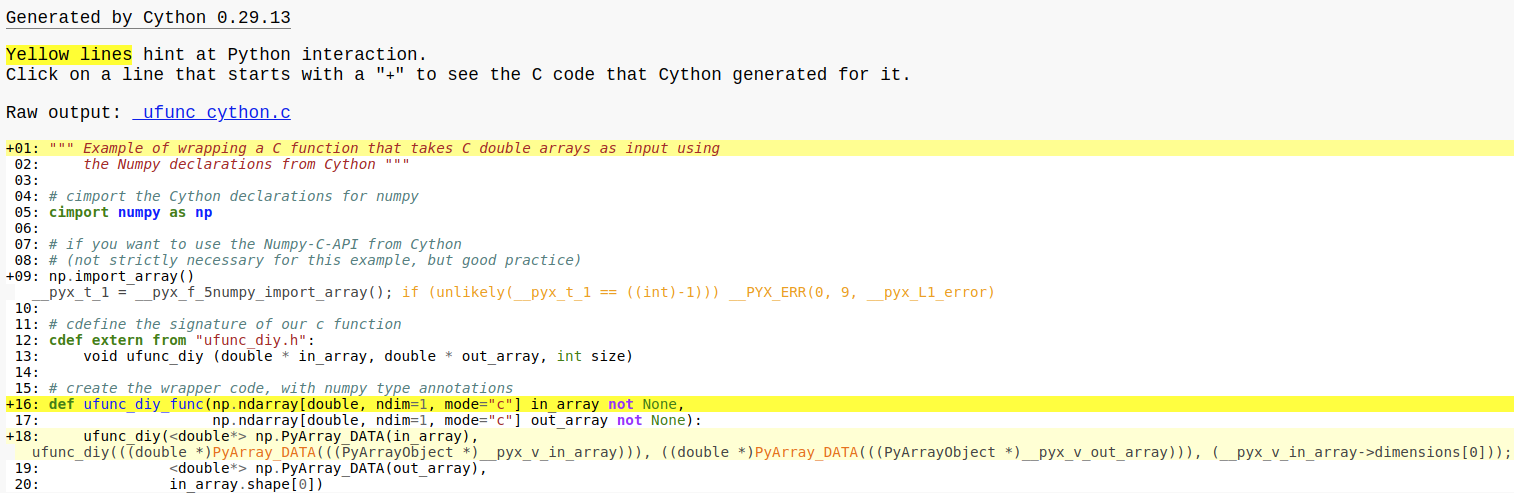

In [5]:
import time
import numpy as np
import ufunc_cython

start = time.process_time() 
ufunc_cython.ufunc_diy_func(x, x)
end = time.process_time()
print("ufunc_diy time: ", end-start)

ufunc_diy time:  0.004998610999999986


## 四、NumPy之求和约定 einsum

### NumPy 中 einsum

- 使用爱因斯坦求和约定（Einstein summation convention）简化 NumPy 中的<font color=#ff3300 size=3 face="黑体">数组运算</font>。

In [48]:
import numpy as np

In [49]:
A = np.array([0,1,2])
A

array([0, 1, 2])

In [50]:
B = np.arange(12).reshape(3, 4)
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [50]:
# A 看成行向量，如何乘以（矩阵乘法）B？如下直接相乘会出错
A*B

ValueError: operands could not be broadcast together with shapes (3,) (3,4) 

> **分析上面运算为什么会出错。**

In [51]:
C = A[:, np.newaxis]*B 
C

array([[ 0,  0,  0,  0],
       [ 4,  5,  6,  7],
       [16, 18, 20, 22]])

In [52]:
C.sum(axis=0)

array([20, 23, 26, 29])

In [53]:
D = np.einsum('i,ij->j', A, B)
D

array([20, 23, 26, 29])

In [57]:
# 耗时耗内存
%timeit (A[:, np.newaxis]* B).sum(axis=1)

The slowest run took 31.97 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.98 µs per loop


In [58]:
%timeit np.einsum('i,ij->j', A, B)

The slowest run took 12.37 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.73 µs per loop


In [59]:
E = np.einsum('i,ij->i', A, B)
E

array([ 0, 22, 76])

#### 关键是为输入数组的轴和我们想要输出的数组选择正确的标签。

可以选择两种方式之一执行此操作：

- 使用字符串


- 使用整数列表

#### 一个很好的例子是矩阵乘法，它将行与列相乘，然后对乘积结果求和。

- 对于两个二维数组 A 和 B，矩阵乘法操作可以用 np.einsum(‘ij,jk->ik’, A, B) 完成。


- 字符串 ’ij,jk->ik’ 是什么意思？


- 它被箭头 -> 分成两部分。左侧部分标记输入数组的轴：’ij’ 标记 A 和  ’jk’ 标记 B。字符串的右侧部分用字母 “ik” 标记单个输出数组的轴。


- 即输入两个二维数组，输出一个新的二维数组。

In [61]:
A = np.array([[1,1,1],
              [2,2,2],
              [5,5,5]])

B = np.array([[0,1,0],
              [1,1,0],
              [1,1,1]])

In [34]:
np.einsum('ij,jk->ik', A, B)

array([[ 2,  3,  1],
       [ 4,  6,  2],
       [10, 15,  5]])

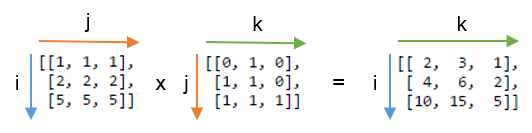

### 真相，'ij,jk->ik' 背后对应的数学公式

$\large\sum_{j} A_{ij} B_{jk}$

### einsum 可以替代如下常用的运算

- 矩阵求迹：trace


- 求矩阵对角线：diag


- 张量（沿轴）求和：sum


- 张量转置：transopose


- 矩阵乘法：dot


- 张量乘法：tensordot


- 向量内积：inner


- 外积：outer

In [17]:
a = np.array([1, 1, 1])
b = np.array([2, 3, 4])
#%timeit 
np.inner(a,b)

9

In [18]:
#%timeit 
np.einsum('i,i->',a,b)

9

In [19]:
np.outer

<function numpy.outer>

In [24]:
a = np.arange(9).reshape((3,3))
a, np.trace(a)

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]), 12)

### 'ij,jk->ijk' 什么操作

In [63]:
np.einsum('ij,jk->ijk', A, B)

array([[[0, 1, 0],
        [1, 1, 0],
        [1, 1, 1]],

       [[0, 2, 0],
        [2, 2, 0],
        [2, 2, 2]],

       [[0, 5, 0],
        [5, 5, 0],
        [5, 5, 5]]])

In [64]:
A

array([[1, 1, 1],
       [2, 2, 2],
       [5, 5, 5]])

In [65]:
B

array([[0, 1, 0],
       [1, 1, 0],
       [1, 1, 1]])

- 类似情况

In [66]:
x = np.array([1,2,3])
y = np.array([1,2,3])

In [67]:
np.einsum('i,j->ij', x, y)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [ ]:
x -> 
[[1, 1, 1],
 [2, 2, 2],
 [3, 3, 3]]

y ->
[[1, 2, 3],
 [1, 2, 3],
 [1, 2, 3]]

然后两个二维数组元素级别相乘

In [68]:
np.einsum('i,j,k->ijk', x, y, x)

array([[[ 1,  2,  3],
        [ 2,  4,  6],
        [ 3,  6,  9]],

       [[ 2,  4,  6],
        [ 4,  8, 12],
        [ 6, 12, 18]],

       [[ 3,  6,  9],
        [ 6, 12, 18],
        [ 9, 18, 27]]])

In [69]:
np.einsum('i,j,k->ij', x, y, x)

array([[ 6, 12, 18],
       [12, 24, 36],
       [18, 36, 54]])

### 常用 einsum 操作

In [62]:
# 1 维

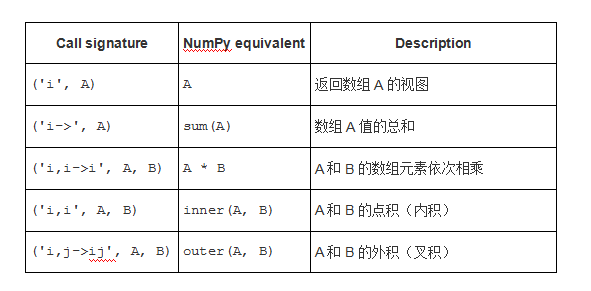

In [ ]:
# Whenever a label is repeated, it is summed, 
# so np.einsum('i,i', a, b) is equivalent to np.inner(a,b). 
# If a label appears only once, it is not summed, 
# so np.einsum('i', a) produces a view of a with no changes.

In [12]:
a = np.arange(9)
np.einsum('i,i',a, a)

204

In [13]:
b = np.einsum('i', a)

In [15]:
b.base is a

True

In [ ]:
# 2 维

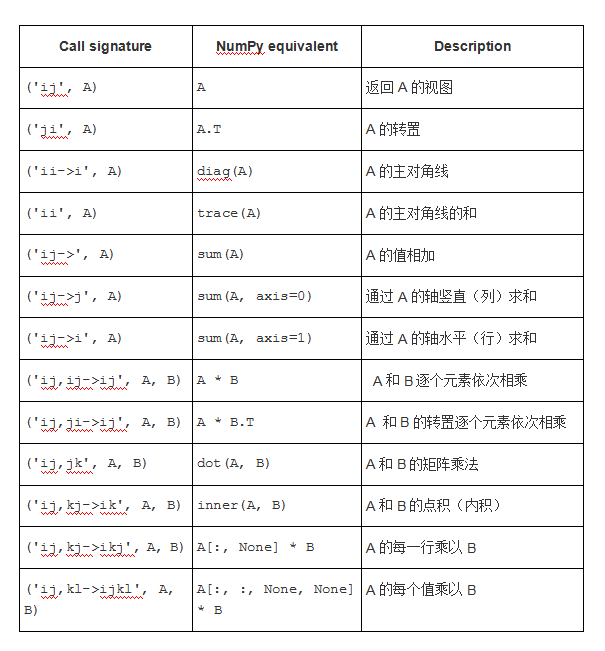

In [70]:
A

array([[1, 1, 1],
       [2, 2, 2],
       [5, 5, 5]])

In [71]:
B

array([[0, 1, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [72]:
np.einsum('ij,kj->ikj', A, B)

array([[[0, 1, 0],
        [1, 1, 0],
        [1, 1, 1]],

       [[0, 2, 0],
        [2, 2, 0],
        [2, 2, 2]],

       [[0, 5, 0],
        [5, 5, 0],
        [5, 5, 5]]])

In [22]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [23]:
np.einsum('ii', a), np.einsum('ii->', a)

(12, 12)

In [24]:
np.einsum('ij,kj', a, a)

array([[  5,  14,  23],
       [ 14,  50,  86],
       [ 23,  86, 149]])

In [29]:
np.einsum('ij,kj->', a, a)

450

In [21]:
np.einsum('ij,jk->ik', a, a)

array([[ 150,  160,  170,  180,  190],
       [ 400,  435,  470,  505,  540],
       [ 650,  710,  770,  830,  890],
       [ 900,  985, 1070, 1155, 1240],
       [1150, 1260, 1370, 1480, 1590]])

## 课堂练习

- 创建 (100, 3, 3) 型数组 pictures，表示 100 张图像数据，以及一个 (3,3) 数组 kernel。

kernel 如下

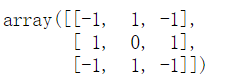

- 使用 np.einsum 将 filter 与每个图像元素级相乘再求和。

In [28]:
kernel = np.array([[-1, 1, -1],[1, 0, 1], [-1, 1, -1]])
kernel

array([[-1,  1, -1],
       [ 1,  0,  1],
       [-1,  1, -1]])

In [31]:
pictures = np.arange(100*9).reshape(100, 3, 3)
pictures.shape

(100, 3, 3)

In [34]:
pictures;

In [32]:
np.einsum('ijk,jk', pictures, kernel)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 有关爱因斯坦求和约定更多内容请扫描阅读

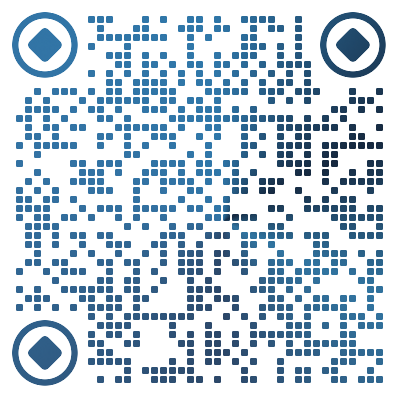